<a href="https://colab.research.google.com/github/kapil0808/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloaded dataset from the link

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-datase

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HR-Employee-Attrition.csv']))
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#some basic statistical details like percentile, mean, standard deviation etc.
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


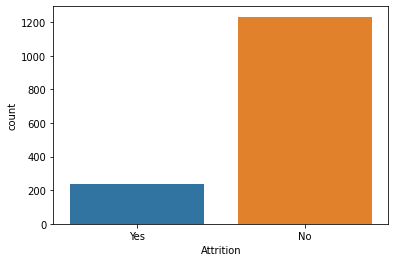

In [9]:
sns.countplot(df['Attrition'])

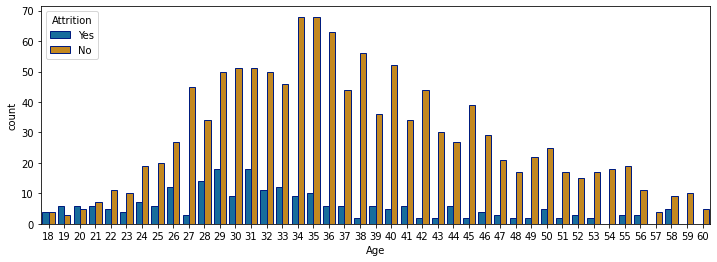

In [10]:
#the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [11]:
#Printed all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [12]:
#Removed unneeded columns

#Removed the column EmployeeNumber
df = df.drop('EmployeeNumber', axis = 1) # A number assignment 
#Removed the column StandardHours
df = df.drop('StandardHours', axis = 1) #Contains only value 80 
#Removed the column EmployeeCount
df = df.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Removed the column EmployeeCount
df = df.drop('Over18', axis = 1) #Contains only the value 'Yes'

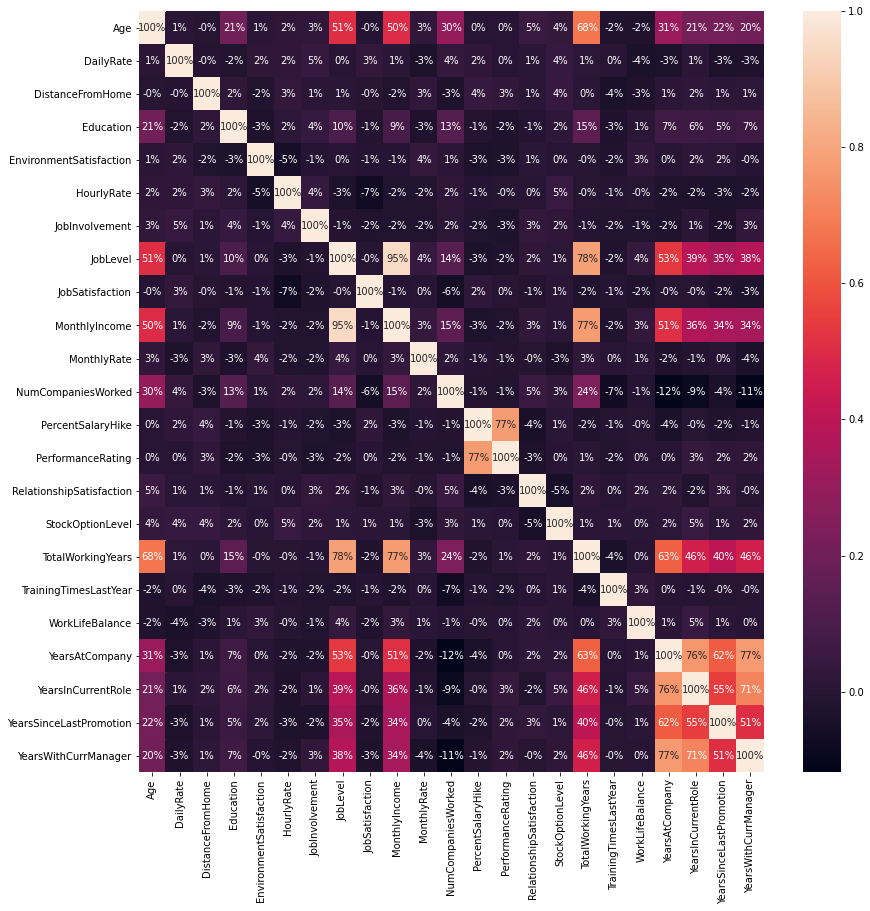

In [13]:
#Visualize the correlation
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [14]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype != 'O':
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [15]:
df.head(5) 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [16]:
feature_scale=[feature for feature in df.columns if feature not in ['Attrition']]

In [17]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df[feature_scale])
df = pd.concat([df['Attrition'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [18]:
X = df.drop('Attrition', axis = 1)
Y = df[['Attrition']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
Y_Pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


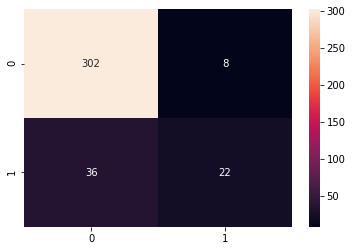

In [21]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_Pred),annot=True,fmt='2.0f')

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.733
Recall: 0.379
Accuracy: 0.880
F1 Score: 0.500


### Weighted Logistic Regression

In [23]:
# define class weights
w = {0:1, 1:5}
# define model
lg2 = LogisticRegression(random_state=0, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
Y_Pred = lg2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


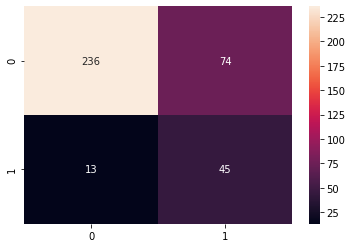

In [24]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_Pred),annot=True,fmt='2.0f')

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.378
Recall: 0.776
Accuracy: 0.764
F1 Score: 0.508


In [26]:
# define class weights
w = {0:1, 1:20}
# define model
lg2 = LogisticRegression(random_state=0, class_weight=w)
# fit it
lg2.fit(X_train,Y_train)
# test
Y_pred = lg2.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


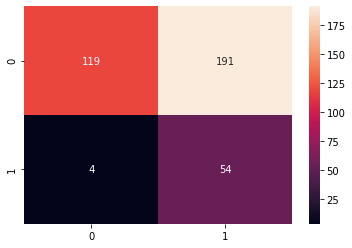

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='2.0f')

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.378
Recall: 0.776
Accuracy: 0.764
F1 Score: 0.508


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree.fit(X_train, Y_train)
Y_Pred = Tree.predict(X_test)

In [30]:
importances = pd.DataFrame({"feature": X_train.columns, "importance": Tree.feature_importances_})
importances.sort_values("importance", ascending=False)[:10]

,feature,importance
15,MonthlyIncome,0.146836
18,OverTime,0.112277
9,HourlyRate,0.076987
7,EnvironmentSatisfaction,0.069919
14,MaritalStatus,0.058743
17,NumCompaniesWorked,0.058688
26,YearsAtCompany,0.057286
2,DailyRate,0.054932
4,DistanceFromHome,0.054170
28,YearsSinceLastPromotion,0.052666


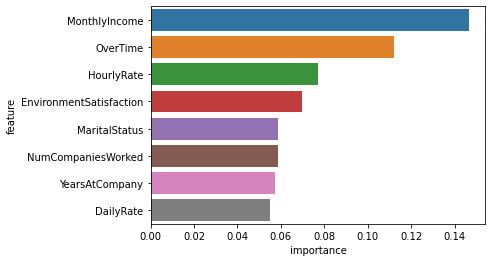

In [31]:
sns.barplot(data=importances.sort_values("importance", ascending=False).head(8), x="importance", y="feature")

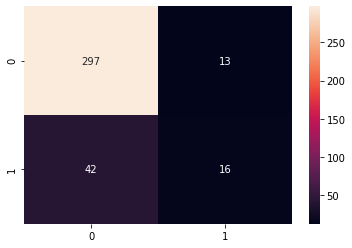

In [32]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_Pred),annot=True,fmt='2.0f')

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.552
Recall: 0.276
Accuracy: 0.851
F1 Score: 0.368


In [34]:
#Use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
Y_Pred=forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


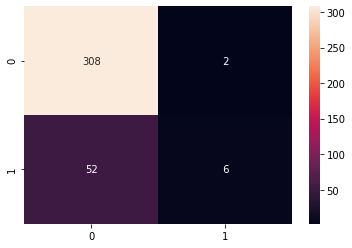

In [35]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_Pred),annot=True,fmt='2.0f')

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.750
Recall: 0.103
Accuracy: 0.853
F1 Score: 0.182


In [37]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


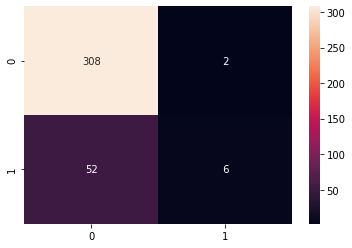

In [38]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test,Y_Pred),annot=True,fmt='2.0f')

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(Y_test,Y_Pred))
print('Recall: %.3f' % recall_score(Y_test,Y_Pred))
print('Accuracy: %.3f' % accuracy_score(Y_test,Y_Pred))
print('F1 Score: %.3f' % f1_score(Y_test,Y_Pred))

Precision: 0.750
Recall: 0.103
Accuracy: 0.853
F1 Score: 0.182


## K-Mean CLustering


In [44]:
xscaled=X.reset_index(drop=True)
xscaled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,0.379672,-0.057788,1.032716,1.153254,1.236820,-0.108350,0.726020,2.125136,1.591746,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,-1.026167,-0.057788,0.626374,-0.660853,-0.133282,-0.291719,1.488876,-0.678049,-0.628241,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,-1.026167,-0.961486,-0.998992,0.246200,1.236820,-0.937654,-1.674841,1.324226,1.591746,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,0.379672,-0.961486,0.626374,0.246200,-0.133282,-0.763634,1.243211,-0.678049,1.591746,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,0.379672,-0.961486,-0.998992,-0.660853,-0.133282,-0.644858,0.325900,2.525591,-0.628241,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [48]:
from sklearn.decomposition import PCA
xpca=PCA(n_components=22).fit_transform(xscaled)
xpca.shape

(1470, 22)

In [51]:
dfpca=pd.DataFrame(data=xpca, columns=np.arange(1,23))


In [54]:
q1=dfpca.quantile(0.25)
q3=dfpca.quantile(0.75)
iqr=q3-q1

ll=q1-iqr
ul=q3+iqr

dfpca=dfpca[~((dfpca<ll) | (dfpca>ul)).any(axis=1)]
dfpca=dfpca.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


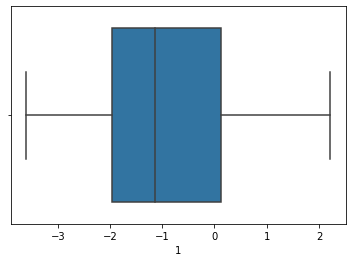

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


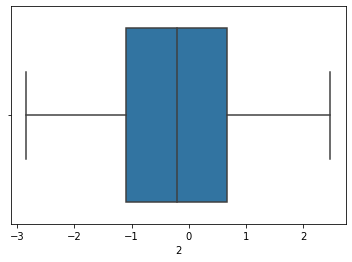

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


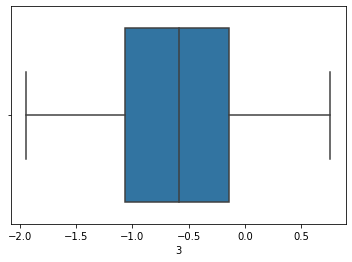

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


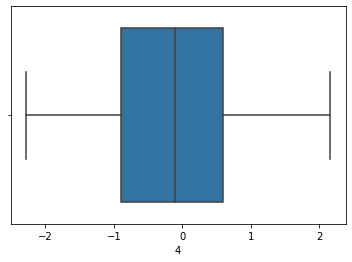

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


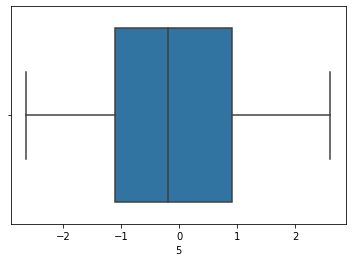

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


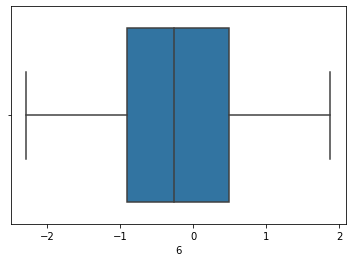

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


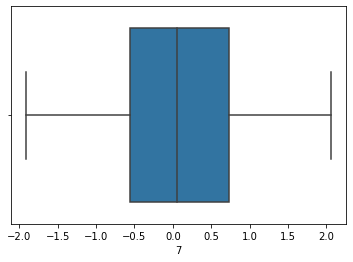

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


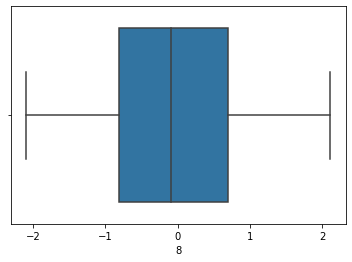

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


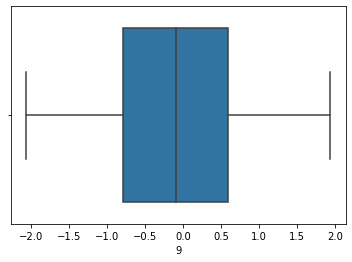

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


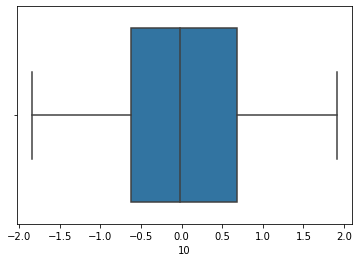

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


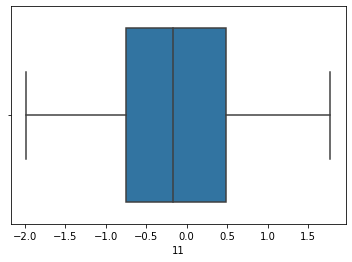

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


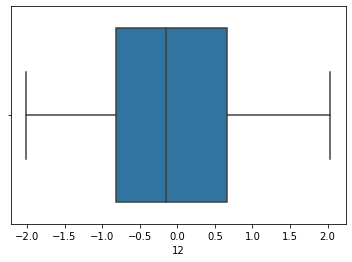

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


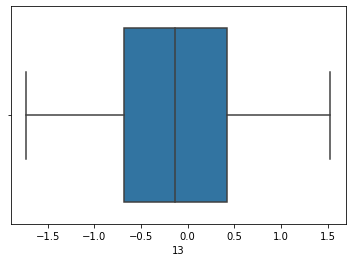

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


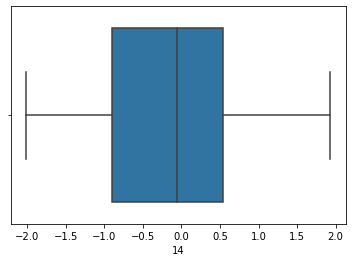

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


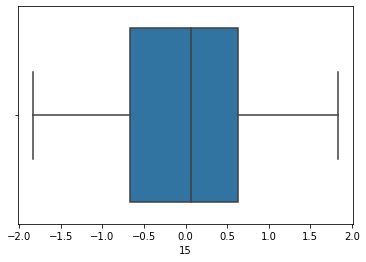

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


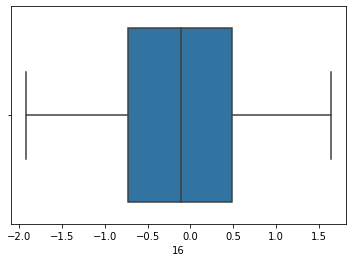

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


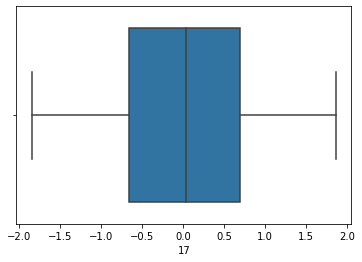

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


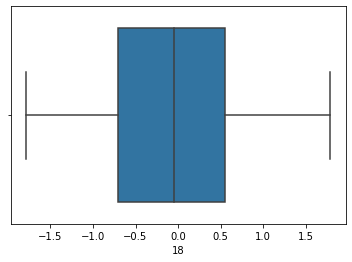

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


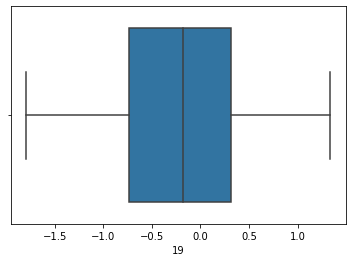

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


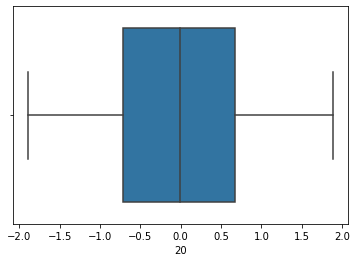

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


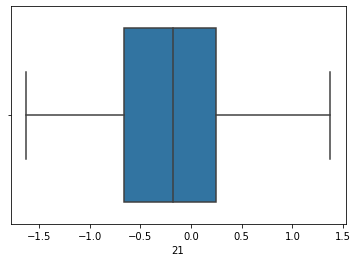

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


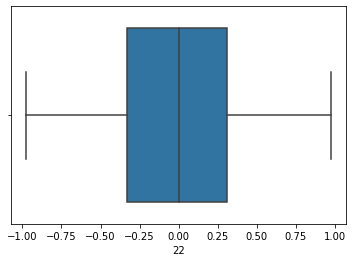

In [55]:
for i in range(len(dfpca.columns)):
    sns.boxplot(dfpca.iloc[:,i])
    plt.show()

In [58]:

from sklearn.cluster import KMeans
inert=[]

for k in range(1,12):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(dfpca)
    inert.append(kmeans.inertia_)    
    
    
inertia=pd.DataFrame()
inertia['Clusters']=np.arange(1,12)
inertia['inertia']=inert 
inertia
    


,Clusters,inertia
0,1,6277.674756
1,2,5746.969183
2,3,5402.753484
3,4,5197.477665
4,5,5051.373202
5,6,4939.803841
6,7,4816.237867
7,8,4722.499743
8,9,4634.664014
9,10,4574.199099


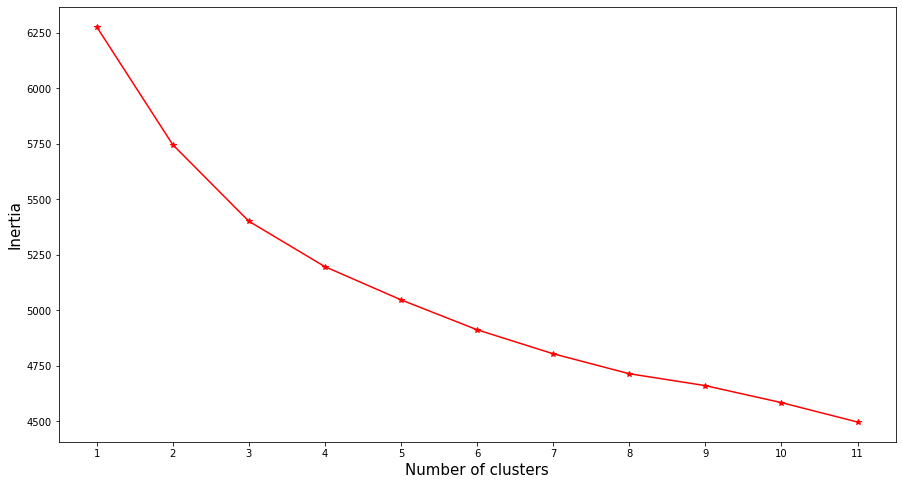

In [57]:
plt.figure(figsize=(15,8))
plt.plot(range(1,12),inertia['inertia'],color='red',marker='*')
plt.xticks(np.arange(1,12))
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.show()

In [59]:
kmeans=KMeans(n_clusters=2 , n_init=15, random_state=10)
kmeans.fit(dfpca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [60]:
dfkmean=dfpca.copy()
dfkmean['label']=kmeans.labels_
dfkmean.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,label
0,-0.873627,-0.450766,-1.221610,-0.214217,-0.357198,1.440330,-0.709776,1.025099,0.076752,0.016471,-0.061069,1.962977,-1.734413,-0.379295,-0.779531,-1.084498,0.381388,0.208599,0.187634,-1.391969,-0.266562,0.149743,0
1,-0.635566,-1.135124,-0.414589,-0.653025,-2.355668,0.491482,-1.252217,-0.465797,-1.310035,0.444410,0.177658,-0.131177,-0.516588,-0.218212,-1.654084,-0.275609,1.032988,-0.106597,0.053176,1.003806,-0.165636,-0.331547,1
2,-1.484816,0.178455,-0.170963,-1.427106,-0.892358,-2.260771,0.279023,0.196559,0.021190,-0.155383,1.566860,-0.412366,0.105358,-1.576679,1.140179,0.207302,-0.055797,0.570038,0.288955,-0.774575,0.021383,-0.477292,1
3,-0.225065,-1.175095,-0.970799,0.117501,-2.292222,1.876748,-0.378435,0.592232,1.426828,-0.026715,-0.098480,-0.314965,-1.019550,0.762087,1.683324,-0.185722,0.370276,-1.225978,0.450787,0.405482,-0.180084,-0.637321,0
4,-2.018922,0.738345,-0.091719,-2.283711,-0.334785,-0.497894,-0.623334,0.135223,-1.092858,0.463314,1.145983,-0.909630,1.259282,-0.440072,0.479346,-1.408847,-0.234423,-0.371536,-0.731008,0.494065,-0.342379,-0.218101,1


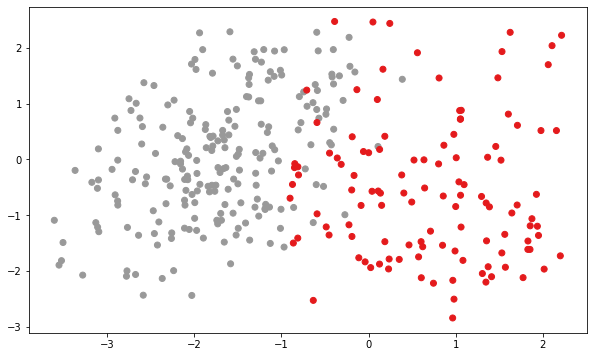

In [61]:
# Visualization of clusters 
# 2D
# pca component 1 & 2
plt.figure(figsize=(10,6))
plt.scatter(dfkmean[dfkmean.columns[0]],dfkmean[dfkmean.columns[1]],c=kmeans.labels_ , cmap=plt.cm.Set1)
plt.show()